Importing Libraries

In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

Loading the Data

In [3]:
df = pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


Converting Date to datetime Format

In [4]:
df['Date'] = pd.to_datetime(df.Date)

Checking the Data

In [5]:
print(f'Shape of the Dataset : {df.shape}')
print('\n')
print('Dataset Information')
print(df.info())
print('\n')
print('Empty Datapoints')
print(df.isnull().sum())

Shape of the Dataset : (1692, 7)


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB
None


Empty Datapoints
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


Plotting the Data

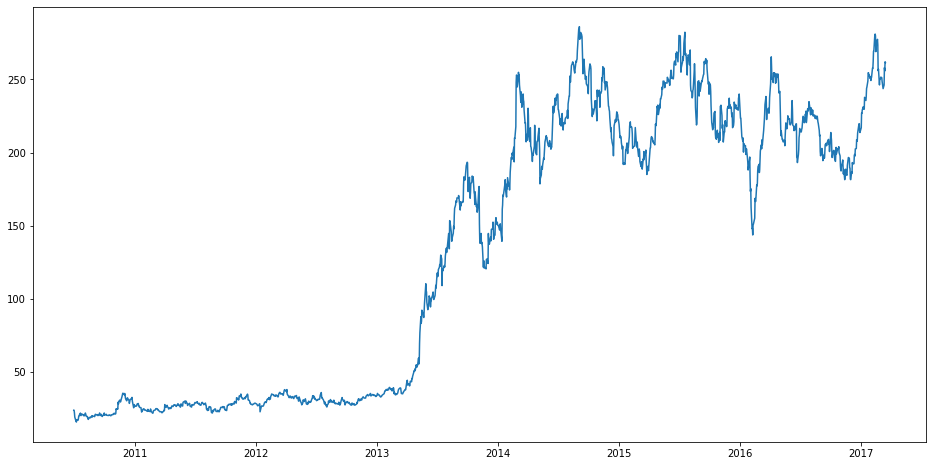

In [6]:
plt.figure(figsize = (16,8))
plt.plot(df['Date'], df['Close'])
plt.show()

Understanding the Correlation

C:\Users\Pankaj\AppData\Local\Temp/ipykernel_208232/3098032456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<AxesSubplot:>

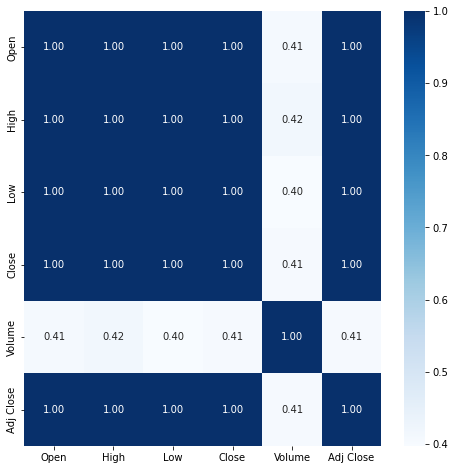

In [7]:
cor = df.corr()
plt.figure(figsize =(8,8))
sns.heatmap(cor, cbar = True, cmap='Blues', annot = True, fmt = '.2f')

Features and Targets

In [8]:
x = df.drop(['Close','Adj Close','Date'], axis=1)
y = df['Close']

Splitting Data into Training and Testing Data

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 3)

Training the Model

In [10]:
model = XGBRegressor() 
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Model Prediction on Training Data

In [11]:
y_predTrain = model.predict(x_train)

Comparing Actual Data vs Predicted Data

In [12]:
dfr = pd.DataFrame({'Actual Price':y_train,'Predicted Price':y_predTrain})
print(dfr)

      Actual Price  Predicted Price
334      28.549999        28.477970
778     135.550003       135.293533
6        17.459999        17.365484
1218    226.029999       225.731354
889     147.529999       148.171982
...            ...              ...
968     216.610001       216.884674
952     204.190002       204.162582
1667    269.230011       269.134125
1273    266.769989       267.222504
1688    258.000000       257.625763

[1353 rows x 2 columns]


Error in Training Data Prediction

In [13]:
score1 = metrics.mean_squared_error(y_predTrain, y_train)
print(f"Mean Squared Error in Training Data: {score1}")

Mean Squared Error in Training Data: 0.13322025912614427


Model Prediction on Testing Data

In [14]:
y_predTest = model.predict(x_test)

Comparing Actual Data vs Predicted Data

In [15]:
dfrt = pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_predTest})
print(dfrt)

      Actual Price  Predicted Price
1551    220.960007       222.748764
904     181.410004       183.470352
1257    267.089996       267.747528
328      28.049999        27.319191
825     174.729996       177.541595
...            ...              ...
1365    230.259995       231.414139
649      38.029999        38.218773
783     153.479996       153.793655
965     207.889999       204.944412
554      29.350000        29.194191

[339 rows x 2 columns]


Error in Testing Data Prediction

In [16]:
score2 = metrics.mean_squared_error(y_predTest, y_test)
print(f"Mean Squared Error in Testing Data: {score2}")

Mean Squared Error in Testing Data: 4.31382222519221


Plotting Actual Data vs Predicted Data

<AxesSubplot:>

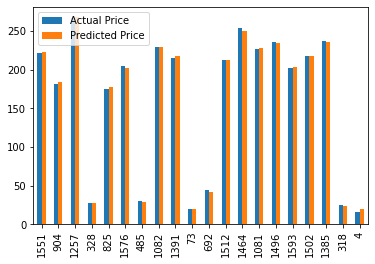

In [17]:
dfrt.head(20).plot(kind = 'bar')

Model Score

In [18]:
print(f"The score for the model is {model.score(x_test,y_test)}")

The score for the model is 0.9995091393776832
